## Hands-on-Machine Learning with Scikit-Learn and Tensorflow, ch. 2 (End-to-End Machine Learning Project)


In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # TODO: Replace with 'with'
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc2c73c0b8>,
      dtype=object)

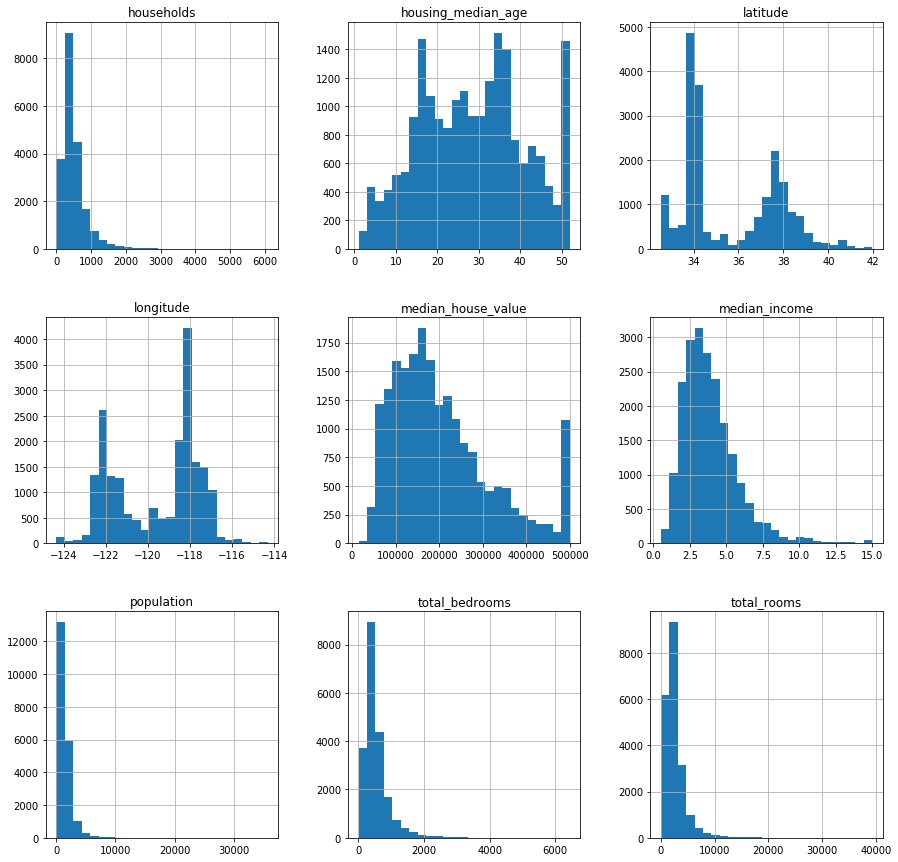

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=25, figsize=(15, 15))

In [10]:
# set test set to 20% of the total data instances; use the meaning of life as
# the seed for the random number generator
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

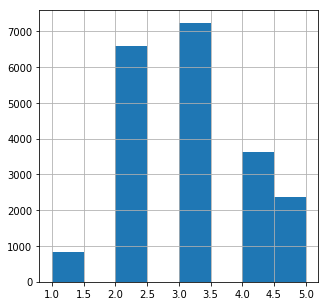

In [11]:
# ensure both the test and train sets have the same proportion of districts across 
# income levels

# add a column income_cat to housing
# limit the highest value for income_cat to 10 (note that the median_income has been 
# scaled to range [0, 15]
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

# note that dataframe.where leaves the value unchanged when the condition is true and changes it to the second
# argument when the condition is false
# any income categories above 5 are put in category 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist(bins=8, figsize=(5, 5))

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split.split returns an array-like object that holds two arrays - indices for training and indices for test
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    print(train_index)

[17606 18632 14650 ... 13908 11159 15775]


In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [14]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [15]:
# return data to its state before adding income_cat column

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


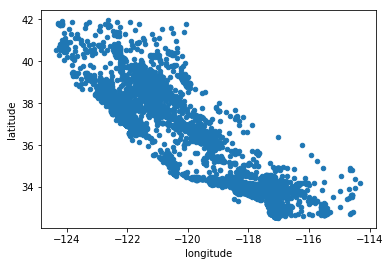

In [17]:
# henceforth, 'housing' refers to training set
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude")

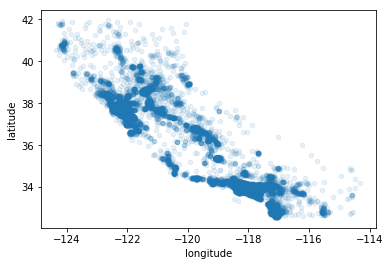

In [18]:
# alpha visually emphasizes density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

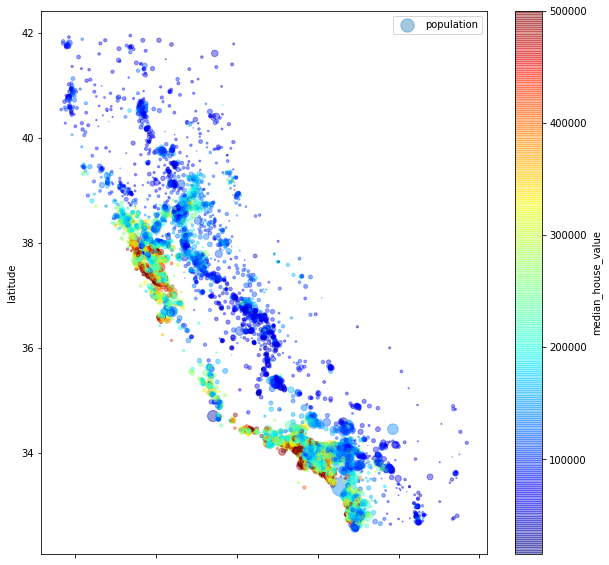

In [19]:
# s option - sets circle diameter proportional to population
# c option - sets color to correspond to median home price
# cmap option - uses predefined color map called 'jet'
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/100, 
             c="median_house_value", figsize=(10,10), label="population", cmap=plt.get_cmap("jet"), alpha=0.4)

In [20]:
# finds Pearson correlation coefficient for any two columns in the set 
# formula : cov(x, y)/(std_dev(x) * std_dev(y))
# 1 means positive correlation, -1 indicates negative correlation
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Pearson's correlation coefficient

$ \rho_{X,Y} = \frac{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 {\sum_{i=1}^{n}(y_i - \bar{y})^2 }}}$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$, respectively

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc2125c320>,
      dtype=object)

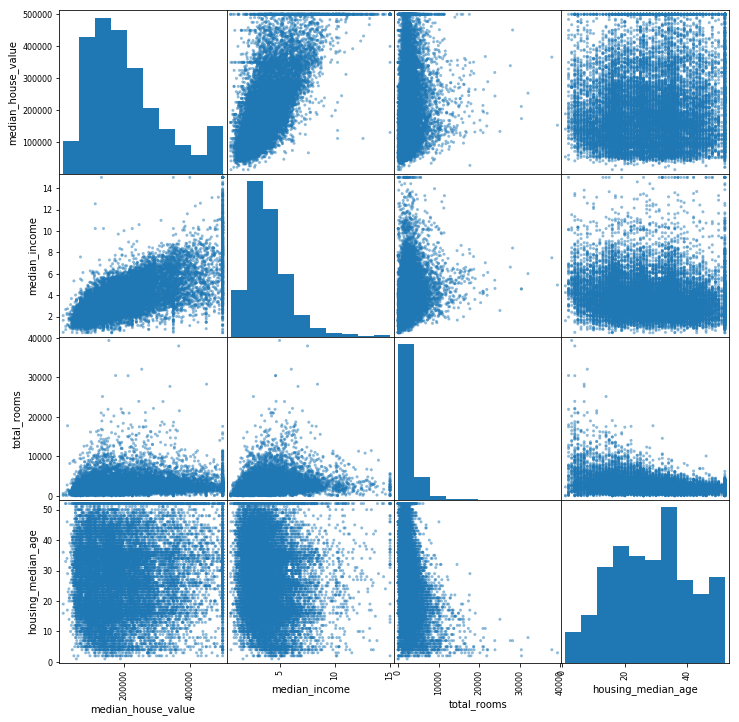

In [21]:
# scatter_matrix calculates and plots Pearson correlation coefficient for user-provided attributes

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12))

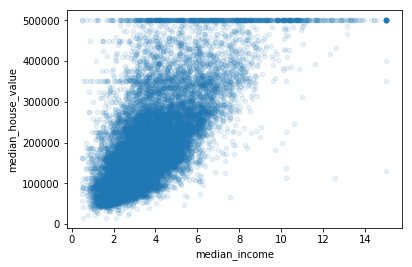

In [22]:
# there is a correlation between median_house_value and median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

In [24]:
# remove "median_house_value" from dataFrame in preparation for data cleaning/transformations
# note that the dataframe.drop() method creates a copy of the training set. axis 1 indicates that the label given is
# for a column; 0 is for a row. In this case, because the label exists only on a column, the axis option is 
# redundant

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Not all samples have a value for total_bedrooms. Three options are to

* delete the samples with a missing total_bedrooms value
* remove the total_bedrooms column
* insert a value where the missing values are (e.g. 0, the mean)


* option 1 - dataFrame.dropna
```python
housing.drop_na(subset=["total_bedrooms"])
```

* option 2 - dataFrame.drop 
```python
housing.drop("total_bedrooms", axis=1)
```

* option 3 - dataFrame.fillna
```python
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [25]:
# Alternatively, use sklearn's Imputer
imputer = Imputer(strategy="median")

# the median can only be calculated for numerical values, so we drop "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis=1)

# we now use the imputer to calculate the median for each attribute
imputer.fit(housing_num)

# the imputer stores the calculations in its statistics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [26]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [27]:
# fill in missing values with the median for their respective attributes
x = imputer.transform(housing_num)

In [28]:
# x is a numpy array
x.__class__.__name__

'ndarray'

In [29]:
x

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [30]:
# to put x in a dataFrame
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [31]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [32]:
# transforming "ocean_proximity"

housing_cat = housing["ocean_proximity"]
housing_cat.head(20)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
16365        INLAND
19684        INLAND
19234     <1H OCEAN
13956        INLAND
2390         INLAND
11176     <1H OCEAN
15614      NEAR BAY
2953         INLAND
13209        INLAND
6569         INLAND
Name: ocean_proximity, dtype: object

In [33]:
housing_cat.__class__

pandas.core.series.Series

In [34]:
# most ML algorithms ask for numerical data, so we convert the strings to numbers:

housing_cat_encoded, housing_categories = housing_cat.factorize()

In [35]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [36]:
# '<1H ocean' has been mapped to 0; 'near ocean' has been mapped to 1, etc
# categories are assigned numbers according to the order in which an instance of the category appears (see above)
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [37]:
# ML algorithms often use distance to measure similarity, i.e. it is possible that an algorithm would assume 0 and 2
# which are '<1H ocean' and 'inland' are more similar than 0 and 4 ('island'), which is not the case

# to fix this, we can use one-hot encoding, i.e. we create one binary feature per category; if the sample is 
# 'near bay', then it is marked 1 for 'near bay' and every other feature is marked 0

encoder = OneHotEncoder()

# a -1 argument to reshape indicates that that dimension should be inferred from the length of the array and 
# remaining dimensions

hce = housing_cat_encoded.reshape(-1, 1)

In [38]:
hce

array([[0],
       [0],
       [1],
       ...,
       [2],
       [0],
       [3]])

In [39]:
hce.shape

(16512, 1)

In [40]:
np.array([1, 2, 3, 4, 5]).shape

(5,)

In [41]:
# fit() does the estimating on a dataset. transform() transforms a dataset fit_transform() does both
# fit_transform expects a 2-d array
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [42]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# After one-hot encoding, you have a matrix in which most values are 0, i.e. each row is all zeros except for a single
# 1 value. To save space, a sparse matrix is used.
# A sparse matrix stores only the location of non-zero values.

In [44]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

to apply the transformation from text straight to one-hot encoding

```
from sklearn.preprocessing import CategoricalEncoder

cat_encoder = CategoricalEncoder()

housing_cat_reshaped = housing_cat.values.reshape(-1, 1)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
```
housing_cat_1hot is a sparse matrix


if you prefer a dense matrix:

```
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
```
housing_cat_1hot is an array of arrays, i.e. a dense matrix

```
cat_encoder.categories_
```
returns an array of categories (like housing_categories above)

In [45]:
housing_cat.values[:10]

array(['<1H OCEAN', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', '<1H OCEAN',
       'INLAND', '<1H OCEAN', 'INLAND', '<1H OCEAN', '<1H OCEAN'],
      dtype=object)

In [46]:
housing_cat.values.reshape(-1, 1)

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ...,
       ['INLAND'],
       ['<1H OCEAN'],
       ['NEAR BAY']], dtype=object)

In [47]:
# Custom estimator
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [48]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [52]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [53]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)

ValueError: could not convert string to float: 'NEAR BAY'